# Лабораторная работа №6_1
##  Устойчивость методов Рунге–Кутты и Адамса
---  
### Цель: Оценка точности численных методов решения системы дифференциальных уравнений
---
#### Для исследования выберем пункт VIII.11.3: 
$$
\begin{cases}
x' = y \\
y' = x^2 - 1
\end{cases}
$$

В исследовании будем использовать методы Рунге-Кутта и Адамса 4-х порядков

#### Импорт модулей:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Предварительная инициализация:

In [2]:
t_start = 0

t_end = 10

point_1 = np.array([1, 0])
point_2 = np.array([-1, 0])

point_0_1 = np.array([0.9, 0.01])
point_0_2 = np.array([-0.9, 0.01]) 


#### Объявление функций: 

In [3]:
def f(point):
    return np.array([point[1], point[0]*point[0] - 1])

def show_phase_traj_near_point(phase_traj, point):
    print('creating plot...')
    plt.figure (figsize=[16, 8])
    plt.plot (phase_traj[0], phase_traj[1], color='g')
    point_x = point[0]
    point_y = point[1]

    plt.plot (point_x, point_y, 'ro')
    plt.title (f"Phase traectory local to ({point_x}, {point_y})")

    plt.legend ()
    plt.grid ()

    plt.show ()

def adams (point_0, it_num):
    print('Step is defined by time interval and custom number of iterations')  
    step = (t_end - t_start) / it_num
    print('step : ' + str(step))

    print('------------------------------')

    print('Make first, second and third itterations \'by hand\' for using methods')
    point_1 = point_0 + step * f(point_0)
    point_2 = point_1 + step * (3 * f(point_1) / 2 - f(point_0) / 2)
    point_3 = point_2 + step * (23 * f(point_2) / 12 - 4 * f(point_1) / 3 + 5 * f(point_0) / 12)
    
    print('point_1 : ' + str(point_1))
    print('point_2 : ' + str(point_2))
    print('point_3 : ' + str(point_3))

    phase_traj = []

    point = point_3
    point_1 = point_2
    point_2 = point_1
    point_3 = point_0
    phase_traj.append(point)

    print('------------------------------')

    print('start value for evaluating process: ' + str(point))
    print('the main calculating process...')
    for it in range (3, it_num):
        new_point = point +  step * (55 * f(point) / 24 -
        59 * f(point_1) / 24 +
        37 * f(point_2) / 24 -
        3 * f(point_3) / 8)
        
        # We got new solution. Save the oldest
        phase_traj.append (point_3)

        # We have to shift everything
        point_3 = point_2
        point_2 = point_1
        point_1 = point
        point = new_point
    
    # We didn't save the last solutions.
    phase_traj.append (point_3)
    phase_traj.append (point_2)
    phase_traj.append (point_1)
    phase_traj.append (point)

    return phase_traj

def rk(point_0, it_num):
    print('Step is defined by time interval and custom number of iterations')  
    step = (t_end - t_start) / it_num
    print('step : ' + str(step))
    
    print('We\'d build a phase trajectory step by step'
          'beginning with point_0')
    phase_traj = [point_0]
    point = phase_traj[0]
    print('start value for evaluating process: ' + str(point))

    print('the main calculating process...')
    for i in range(it_num):
        k_1 = f(point)
        k_2 = f(point + step * k_1 / 2)
        k_3 = f(point + step * k_2 / 2)
        k_4 = f(point + step * k_3)

        point = point + step * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
        phase_traj.append(point)

    return phase_traj

#### Основная часть

Set start and final value for time
start time: 0
final time: 10
------------------------------
We want to explore the behavior of the phase trajectory in the following poits
[1 0] [-1  0]
Choose locations in the surrounding area around:
------------------------------
[0.9  0.01] [-0.9   0.01]
Explore the first point using runge kutta method:
Step is defined by time interval and custom number of iterations
step : 0.001
We'd build a phase trajectory step by stepbeginning with point_0
start value for evaluating process: [0.9  0.01]
the main calculating process...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


creating plot...


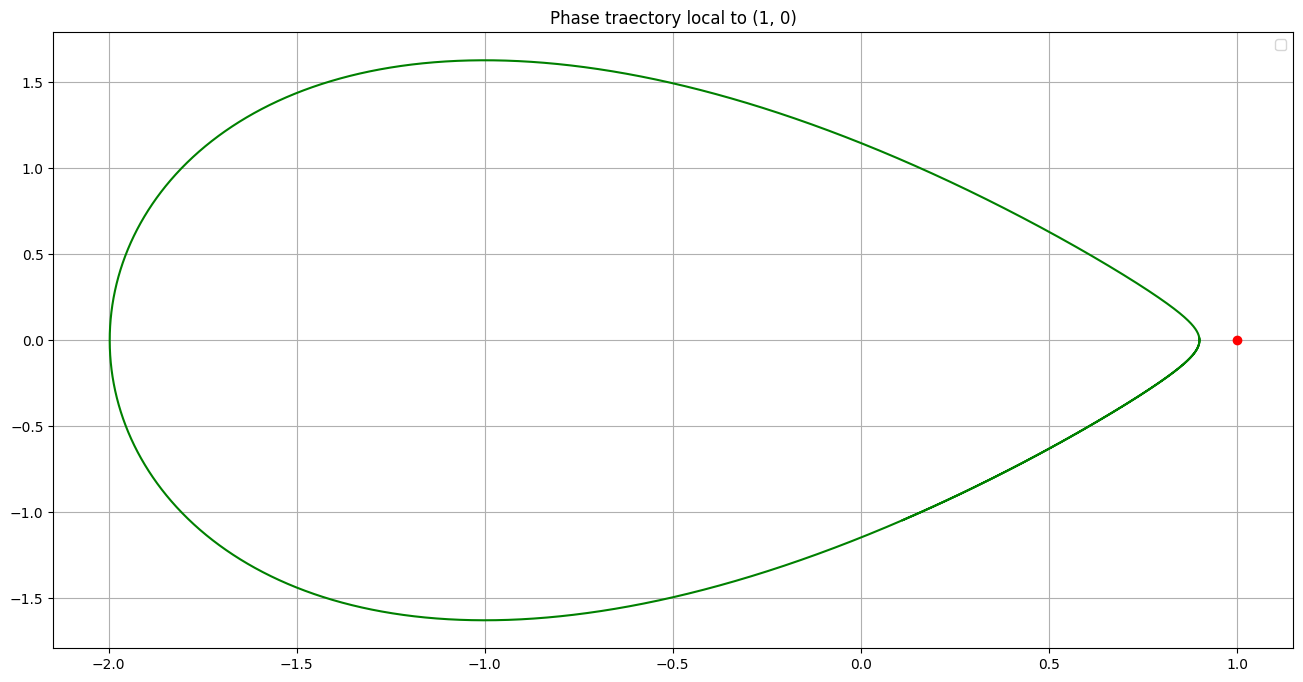

------------------------------
Explore the second point using runge kutta method:
Step is defined by time interval and custom number of iterations
step : 0.001
We'd build a phase trajectory step by stepbeginning with point_0
start value for evaluating process: [-0.9   0.01]
the main calculating process...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


creating plot...


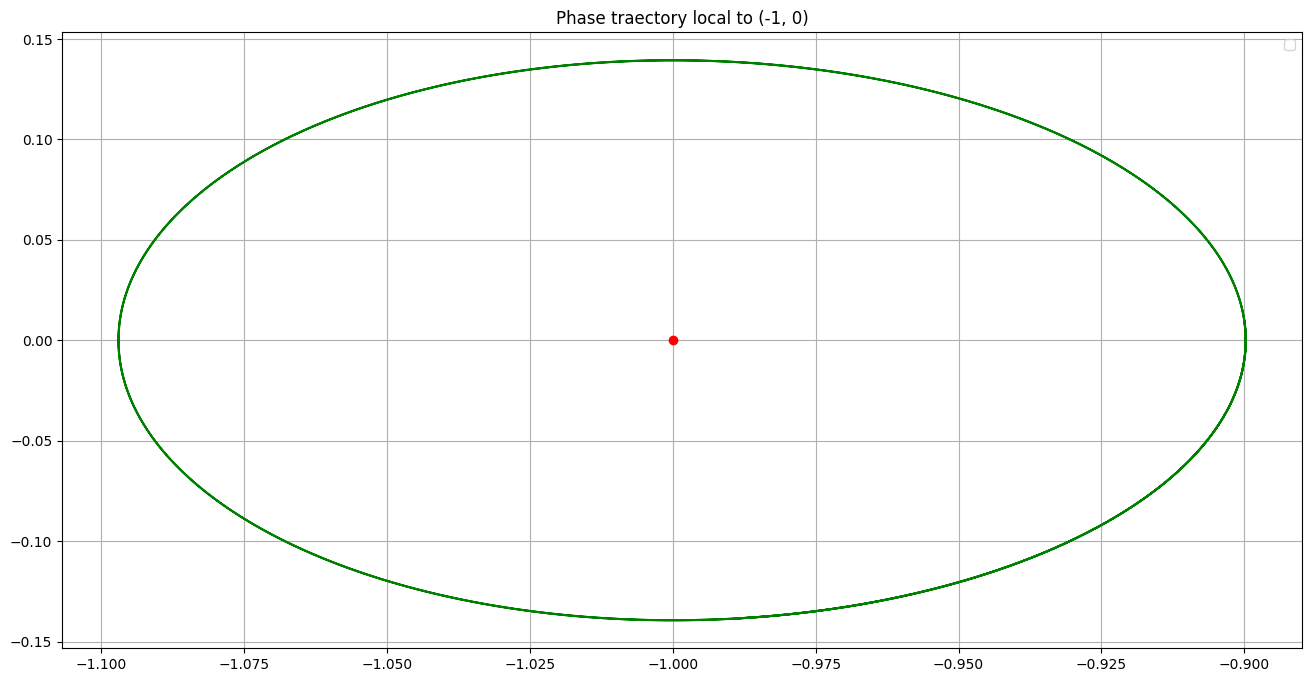

------------------------------
Explore the first point using adams method:
Step is defined by time interval and custom number of iterations
step : 0.001
------------------------------
Make first, second and third itterations 'by hand' for using methods
point_1 : [0.90001 0.00981]
point_2 : [0.90001971 0.00962003]
point_3 : [0.90002924 0.00943007]
------------------------------
start value for evaluating process: [0.90002924 0.00943007]
the main calculating process...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


creating plot...


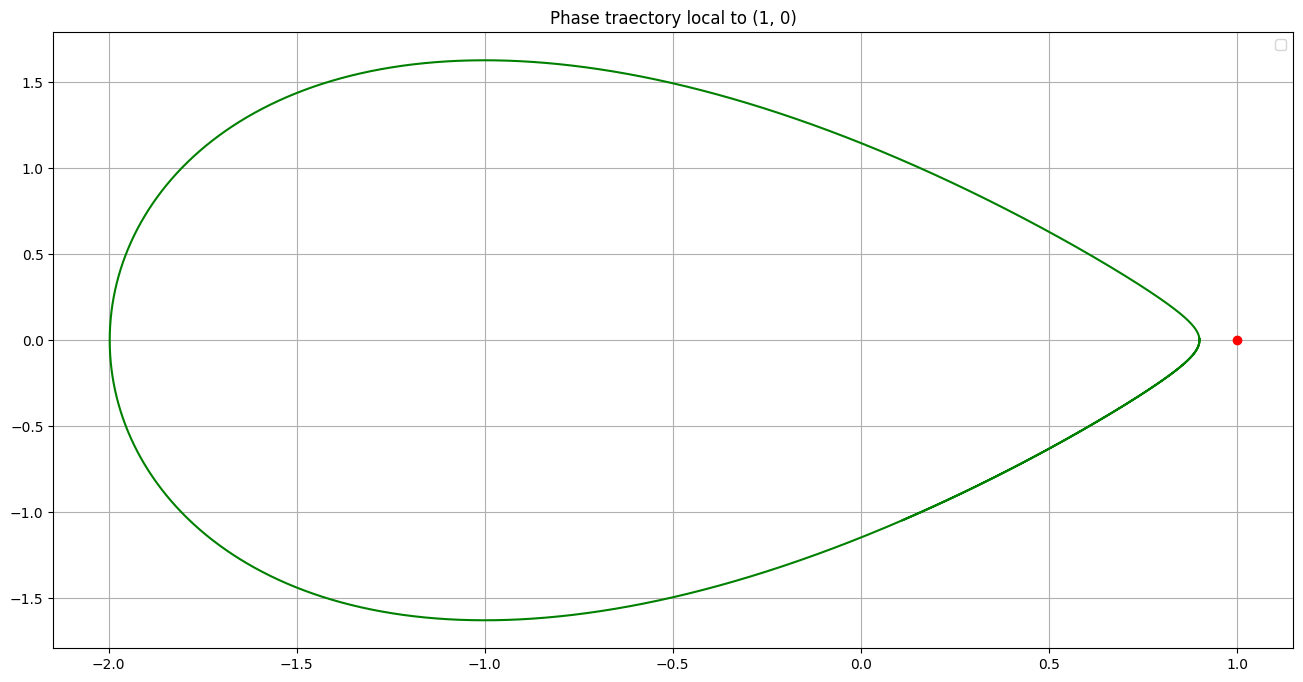

------------------------------
Explore the second point using adams method:
Step is defined by time interval and custom number of iterations
step : 0.001
------------------------------
Make first, second and third itterations 'by hand' for using methods
point_1 : [-0.89999  0.00981]
point_2 : [-0.89998029  0.00961997]
point_3 : [-0.89997076  0.00942993]
------------------------------
start value for evaluating process: [-0.89997076  0.00942993]
the main calculating process...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


creating plot...


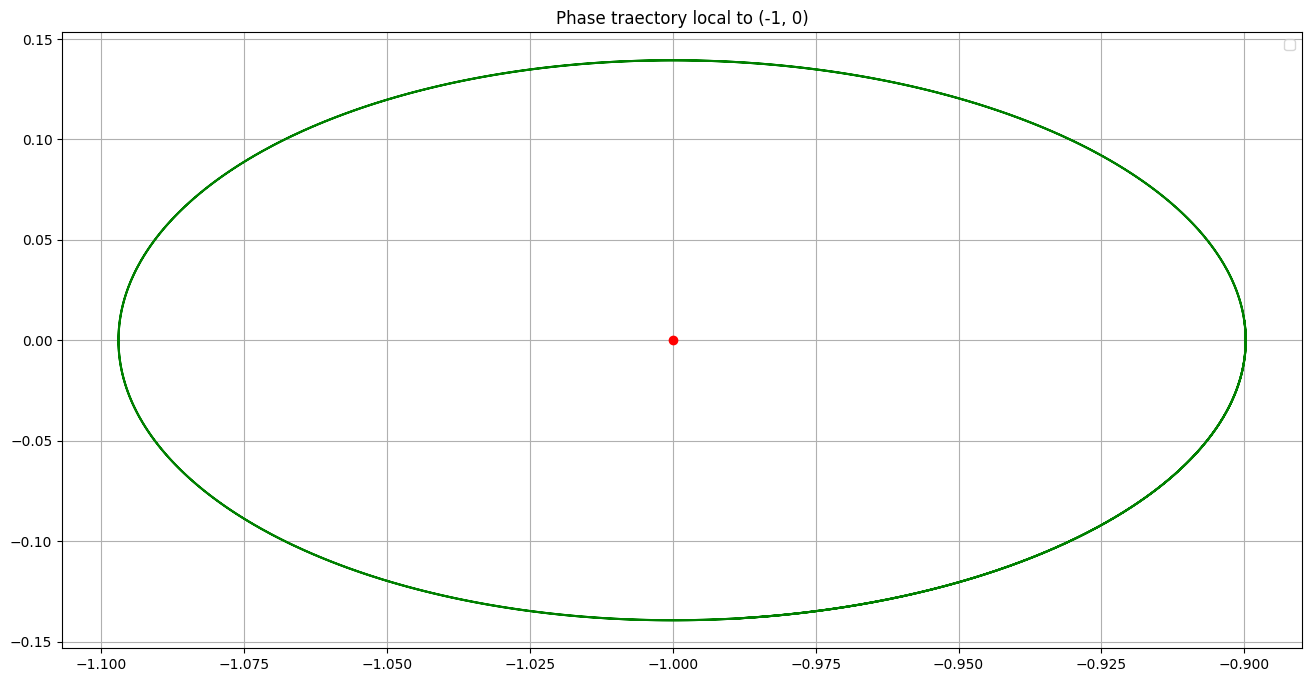

In [4]:
def main():
    print('Set start and final value for time')
    print('start time: ' + str(t_start))
    print('final time: ' + str(t_end))

    print('------------------------------')

    print('We want to explore the behavior of the phase trajectory in the following poits')
    print(point_1, point_2)

    print('Choose locations in the surrounding area around:')
    print('------------------------------')
    print(point_0_1, point_0_2)

    print('Explore the first point using runge kutta method:')
    phase_traj = np.transpose(rk(point_0_1, 10000))
    show_phase_traj_near_point(phase_traj, point_1)

    print('------------------------------')

    print('Explore the second point using runge kutta method:')
    phase_traj = np.transpose(rk(point_0_2, 10000))
    show_phase_traj_near_point(phase_traj, point_2)

    print('------------------------------')

    print('Explore the first point using adams method:')
    phase_traj = np.transpose(adams(point_0_1, 10000))
    show_phase_traj_near_point(phase_traj, point_1)

    print('------------------------------')

    print('Explore the second point using adams method:')
    phase_traj = np.transpose(adams(point_0_2, 10000))
    show_phase_traj_near_point(phase_traj, point_2)

main()

## Заключение
В данной работе для исходной системы методы Рунге-Кутты и Адамса 4-го порядка оказались высоко точными. Отметим эквивалентный резлуьтат для первого и второго методов